<a href="https://colab.research.google.com/github/ShamsulAbedin/CA638I/blob/master/Shamsul_Abedin_CA683I_ID19215008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Data Analytics and Data Mining

Research Question: Which Movie or TV show should I watch in Netflix

Student Details:

*   Student Name: Md Shamsul Abedin Malik
*   Course: CA683I Data Analytics and Data Mining
*   Student Number: 19215008

Netflix has done radical revolution in Entertainment industry and it has created a big platform for the Media industry where wide variety of shows are broadcasting on a regular basis. Sometimes it becomes a big challenge to determine what should I watch next in Netflix.

In this project, I have tried to present a recommender system which will analyze the best movies and TV shows based on rating, contents, director, type, etc where I have used content-based filtering recommendation model. Analysis has been done based on approx. 18K different movies and TV Shows from Netflix.



**Following Package might need to install**


In [0]:
!pip install -q plotly
!pip install -q plotly_express
!pip install rake_nltk
!pip install -q cufflinks

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=81fabd7921d3ea55e93afb197c93a8097210605b7a78a451733096c8b75b71df
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk




**Import Modules from different packages**

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.graph_objs as go
import plotly.offline as py
import plotly_express as px
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
from plotly.offline import init_notebook_mode
import os
from tqdm import tqdm, tqdm_notebook
from IPython.display import HTML
import json
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import cufflinks as cf


**Descriptive Analysis** *italicized text*

In [0]:
# Mount google drive in colab to link the Netflix data-set
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
os.chdir('/content/drive/My Drive/Colab_Notebooks/')

In [0]:
import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Colab_Notebooks/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
		
		
		
		


/content/drive/My Drive/Colab_Notebooks/netflix_titles.csv
/content/drive/My Drive/Colab_Notebooks/Shamsul_Abedin_DA-ID19215008.ipynb


In [0]:
#Reading the dataset
df = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/netflix_titles.csv")

In [0]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [0]:
print("Dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

(6234, 12)

df.columns

Dataset contains 6234 rows and 12 columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [0]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
year_added        11
month_added       11
season_count       0
dtype: int64

In [0]:
df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1189
release_year      72
rating            14
duration         187
listed_in        461
description     6226
year_added        13
month_added       12
season_count      16
dtype: int64

In [0]:
#Find Duplicate entry
df.duplicated().sum()


0

In [0]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)


In [0]:
# Necessary Functions for the Pie chart: 


def pie_plot(labels, values, colors, title):
    fig = {
      "data": [
        {
          "values": values,
          "labels": labels,
          "domain": {"x": [0, .48]},
          "name": "Job Type",
          "sort": False,
          "marker": {'colors': colors},
          "textinfo":"percent+label+value",
          "textfont": {'color': '#FFFFFF', 'size': 10},
          "hole": .6,
          "type": "pie"
        } ],
        "layout": {
            "title":title,
            "annotations": [
                {
                    "font": {
                        "size": 25,

                    },
                    "showarrow": False,
                    "text": ""

                }
            ]
        }
    }
    return fig


In [0]:
# Content Type on Netflix

value_counts = df['type'].value_counts()
labels = value_counts.index.tolist()
py.iplot(pie_plot(labels, value_counts,['#141ad9', '#de7882'], "Type Distribution"))

In [0]:
#Content added in Netflix for TV Shows and Movies over the years


column = "year_added"


DataType1 = df[df["type"] == "TV Show"]
DataType2 = df[df["type"] == "Movie"]

value_count_1 = DataType1[column].value_counts().reset_index()
value_count_1 = value_count_1.rename(columns = {column : "count", "index" : column})
value_count_1['percent'] = value_count_1['count'].apply(lambda x : 100*x/sum(value_count_1['count']))
value_count_1 = value_count_1.sort_values(column)

value_count_2 = DataType2[column].value_counts().reset_index()
value_count_2 = value_count_2.rename(columns = {column : "count", "index" : column})
value_count_2['percent'] = value_count_2['count'].apply(lambda x : 100*x/sum(value_count_2['count']))
value_count_2 = value_count_2.sort_values(column)

trace1 = go.Scatter(x=value_count_1[column], y=value_count_1["count"], name="TV Shows in Netflix", marker=dict(color="#141ad9"))
trace2 = go.Scatter(x=value_count_2[column], y=value_count_2["count"], name="Movies in Netflix", marker=dict(color="#de7882"))
data = [trace1, trace2]
layout = go.Layout(title="The growth of Netflix's library over the years for TV Shows and Movies", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [0]:
#The ratings of the content for TV shows and Movies

column = "rating"

DataType1 = df[df["type"] == "TV Show"]
DataType2 = df[df["type"] == "Movie"]

value_count_1 = DataType1[column].value_counts().reset_index()
value_count_1 = value_count_1.rename(columns = {column : "count", "index" : column})
value_count_1['percent'] = value_count_1['count'].apply(lambda x : 100*x/sum(value_count_1['count']))
value_count_1 = value_count_1.sort_values(column)

value_count_2 = DataType2[column].value_counts().reset_index()
value_count_2 = value_count_2.rename(columns = {column : "count", "index" : column})
value_count_2['percent'] = value_count_2['count'].apply(lambda x : 100*x/sum(value_count_2['count']))
value_count_2 = value_count_2.sort_values(column)

trace1 = go.Bar(x=value_count_1[column], y=value_count_1["count"], name="TV Shows in Netflix", marker=dict(color="#141ad9"))
trace2 = go.Bar(x=value_count_2[column], y=value_count_2["count"], name="Movies in Netflix", marker=dict(color="#de7882"))
data = [trace1, trace2]
layout = go.Layout(title="The ratings of the content for TV shows and Movies", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [0]:
#Some of the oldest movies on Netflix


oldest_movie = df.sort_values("release_year", ascending = True)
oldest_movie = oldest_movie[oldest_movie['duration'] != ""]
oldest_movie[['title', "release_year"]][:15]


,title,release_year
2011,Prelude to War,1942
2013,The Battle of Midway,1942
2022,Undercover: How to Operate Behind Enemy Lines,1943
2023,Why We Fight: The Battle of Russia,1943
2026,WWII: Report from the Aleutians,1943
2017,The Memphis Belle: A Story of a\nFlying Fortress,1944
2019,The Negro Soldier,1944
2021,Tunisian Victory,1944
2012,San Pietro,1945
2009,Nazi Concentration Camps,1945


In [0]:
#Some of the oldest TV Shows on Netflix


Oldest_TvShow = df.sort_values("release_year", ascending = True)
Oldest_TvShow = Oldest_TvShow[Oldest_TvShow['season_count'] != ""]
Oldest_TvShow[['title', "release_year"]][:15]


,title,release_year
4292,Pioneers: First Women Filmmakers*,1925
4079,Pioneers of African-American Cinema,1946
5981,The Twilight Zone (Original Series),1963
5980,The Andy Griffith Show,1967
5704,Star Trek,1968
614,Monty Python's Fliegender Zirkus,1972
5669,Monty Python's Flying Circus,1974
5830,Dad's Army,1977
4273,El Chavo,1979
4369,Ninja Hattori,1981


In [0]:
#Country with the most number of titles for TV Shows and Movies

top_work_unitdf = df['country'].value_counts().rename_axis('Country').reset_index(name='counts')[:10]

fig = px.bar(top_work_unitdf, y="Country", x='counts', orientation='h', title = "Country with the most number of titles for TV Shows and Movies",color=  "counts", color_continuous_scale=px.colors.qualitative.Prism).update_yaxes(categoryorder="total ascending")

fig.show()



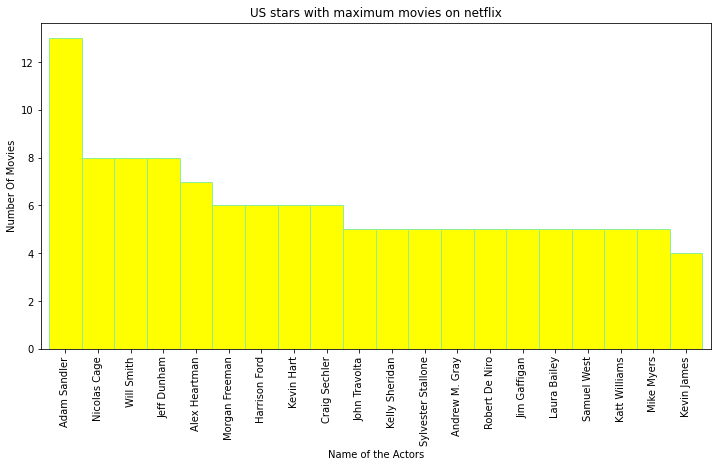

In [0]:
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
indcast=[]
ind=df.query('country=="United States"')
for i in ind['cast']:
    indcast.append(i)
newls=[]
for i in indcast:
    newls.append(str(i).split(',')[0])
inddf=pd.DataFrame(newls,columns=['name'])
ind_df=inddf.drop(inddf.query('name=="nan"').index)
ind_df['name'].value_counts().head(20).plot(kind="bar",width=1,color='Yellow',edgecolor='lightgreen',figsize=(12,6))
plt.xlabel("Name of the Actors")
plt.ylabel("Number Of Movies")
plt.title("US stars with maximum movies on netflix")
plt.show()

In [0]:

df_mov=df.query("type=='Movie'")
df_mov['min']=df_mov['duration'].str.split(' ',expand=True)[0]
df_mov['min']=df_mov['min'].astype(int)
df_mov['hr']=df_mov['min']/60

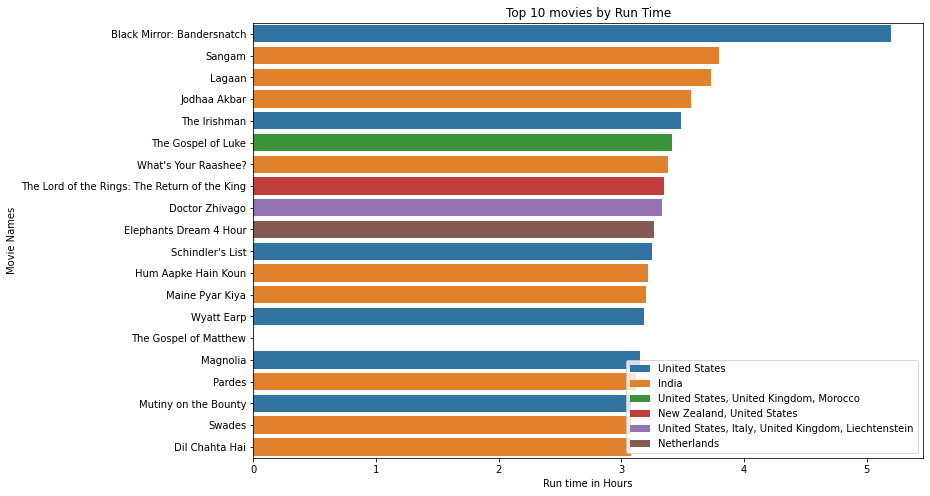

In [0]:
##Top Movies By Run Time

top20run=df_mov.sort_values(by='hr',ascending=False).head(20)
plt.figure(figsize=(12,8))
sns.barplot(data=top20run,y='title',x='hr',hue='country',dodge=False)
plt.legend(loc='lower right')
plt.title('Top 10 movies by Run Time')
plt.xlabel('Run time in Hours')
plt.ylabel('Movie Names')
plt.show()

**Recommendation models**

There are wide variety and significant number of Movies and TV shows available abd people usually tend to watch shows based on the current content as well as best recommended or rated by other viewers.

There are Three types of Recommender systems


* Demographic Filtering
* Content Based Filtering
* Collaborative Filtering

> Content Based Filtering:

Here we will prepare the Plot based on the similarity of the Descriptions and Movie name will be recommended according to the similarity score.

The workflow of the recommender system is to Convert the words into their respective Term Frequency - Inverse Document Frequency Score.

**Building Recommended system**
> Building content based recommender system using cosine similarity algorithm



In [0]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape



(6234, 16151)

**Cosine Similar**

> we will use Cosine Similarity to calculete the nemeric similarity between differnt matices



In [0]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [0]:
names = pd.Series(df.index, index=df['title']).drop_duplicates()


In [0]:

def get_recommendations(title, number=10, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    mov = names[title]

    # Get the pairwsie similarity scores of all movies with that movie
    score = list(enumerate(cosine_sim[mov]))

    # Sort the movies based on the similarity scores
    score = sorted(score, key=lambda x: x[1], reverse=True)

    # Get the scores of the n most similar movies
    score = score[1:number]

    # Get the movie indices
    movie_indices = [i[0] for i in score]

    # Return the top n most similar movies
    return df['title'].iloc[movie_indices]


In [0]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from rake_nltk import Rake


In [0]:
new_df = df[['title','director','cast','listed_in','description']]


In [0]:
new_df.head(10)

,title,director,cast,listed_in,description
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,NaN,Jandino Asporaat,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",Kids' TV,"With the help of three human allies, the Autob..."
3,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",Kids' TV,When a prison ship crash unleashes hundreds of...
4,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",Comedies,When nerdy high schooler Dani finally attracts...
5,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...","Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,Fire Chasers,NaN,NaN,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [0]:
new_df['director']=new_df['director'].fillna(' ')
new_df['director']=new_df['director'].astype('str')
new_df['cast']=new_df['cast'].fillna(' ')
new_df['cast']=new_df['cast'].astype('str')

In [0]:
new_df['Content_Description']= ''
for index,row in new_df.iterrows():
    plot = row['description']
    r = Rake()
    r.extract_keywords_from_text(plot)
    keyword_score = r.get_word_degrees()
    g = ''.join(row['listed_in'].split(',')).lower()
    d = ''.join(row['director'].replace(' ','').split(',')).lower()
    a = ' '.join(row['cast'].replace(' ','').split(',')).lower()
    k = ' '.join(list(keyword_score.keys()))
    row['Content_Description'] = g + ' ' + ' ' + d + ' ' + a + ' ' + k

mydf = new_df[['title','Content_Description']]

In [0]:
mydf.head(10)

,title,Content_Description
0,Norm of the North: King Sized Adventure,children & family movies comedies richardfinn...
1,Jandino: Whatever it Takes,stand-up comedy jandinoasporaat fire challen...
2,Transformers Prime,kids' tv petercullen sumaleemontano frankwel...
3,Transformers: Robots in Disguise,kids' tv willfriedle darrencriss constancezi...
4,#realityhigh,comedies fernandolebrija nestacooper katewals...
5,Apaches,crime tv shows international tv shows spanish-...
6,Automata,international movies sci-fi & fantasy thriller...
7,Fabrizio Copano: Solo pienso en mi,stand-up comedy rodrigotorofranciscoschultz f...
8,Fire Chasers,docuseries science & nature tv protect home...
9,Good People,action & adventure thrillers henrikrubengenz ...


In [0]:
get_recommendations('Good People', 5)

4502       Luck by Chance
4042       Velvet Buzzsaw
3317    Where's the Money
4451           Soundtrack
Name: title, dtype: object

In [0]:
get_recommendations('Norm of the North: King Sized Adventure')

1780    Norm of the North: Keys to the Kingdom
2222                                    Ottaal
70                               We Bare Bears
6205               Pororo - The Little Penguin
4665              Man vs Wild with Sunny Leone
3785                                The Lovers
423                           Garuda Di Dadaku
5239                    Ingress: The Animation
4692                                Sardaar ji
Name: title, dtype: object

**Reference**

1. https://www.kaggle.com/shivamb/netflix-shows

---

